In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt


We read the test data and train data

In [2]:
train_data = pd.read_csv("../input/interest-rate-prediction/train.csv")
test_data = pd.read_csv("../input/interest-rate-prediction/test.csv")
loanid= test_data.Loan_ID
test_data = test_data.drop(columns= ['Loan_ID'])

In [3]:
train_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10156551,18375,6,1,95000.0,2,1,21.45,3,17,28,1,3.0
1,10115057,4000,3,4,-1.0,2,2,21.64,0,18,33,0,2.0
2,10030395,15000,10,1,83000.0,2,2,22.90,3,11,44,1,3.0
3,10158544,27500,10,0,100000.0,1,2,9.66,0,5,14,1,2.0
4,10117658,9450,-1,5,28000.0,0,1,34.89,1,9,24,0,2.0


In [4]:
#To check if any cell has missing values
train_data.isnull().any()


Loan_ID                  False
Loan_Amount_Requested    False
Length_Employed          False
Home_Owner               False
Annual_Income            False
Income_Verified          False
Purpose_Of_Loan          False
Debt_To_Income           False
Inquiries_Last_6Mo       False
Number_Open_Accounts     False
Total_Accounts           False
Gender                   False
Interest_Rate            False
dtype: bool

There are no missing values in the dataset.


This code plots the bar graph distribution of datapoints among different Interest_Rate classes in the dataset


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


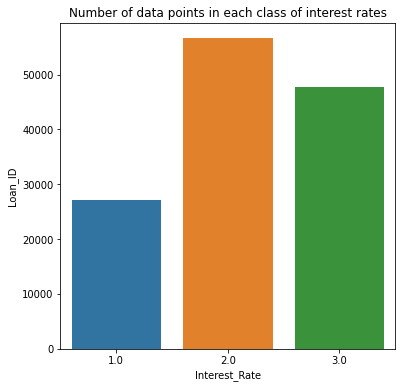

In [5]:
#To plot the distribution of datapoints in each different class.
bar_plot_data=train_data.groupby('Interest_Rate')["Loan_ID"].count().reset_index()
plt.figure(figsize=(6, 6))
plt.title ("Number of data points in each class of interest rates")
sns.barplot(bar_plot_data['Interest_Rate'],bar_plot_data['Loan_ID'])
plt.show()

As we can see, the distribution of datapoints are not equal in different classes. Techniques of oversampling and undersampling can be implemented to equalise the distribution in each class. However, resampling didnt improve accuracy in this problem.

Now, we examine the pattern of some features taken in the order where one class is compared with all other classes considered equal.(OnevsAll)


In [6]:
onevsall= train_data.copy()
onevsall['Interest_Rate'] = onevsall['Interest_Rate'].replace([3,2],"Rest")
onevsall.Interest_Rate.unique()
twovsall= train_data.copy()
twovsall['Interest_Rate'] = twovsall['Interest_Rate'].replace([1,3],"Rest")
twovsall.Interest_Rate.unique()
threevsall= train_data.copy()
threevsall['Interest_Rate'] = threevsall['Interest_Rate'].replace([2,1],"Rest")
threevsall.Interest_Rate.unique()


array([3.0, 'Rest'], dtype=object)

<AxesSubplot:xlabel='Annual_Income', ylabel='Debt_To_Income'>

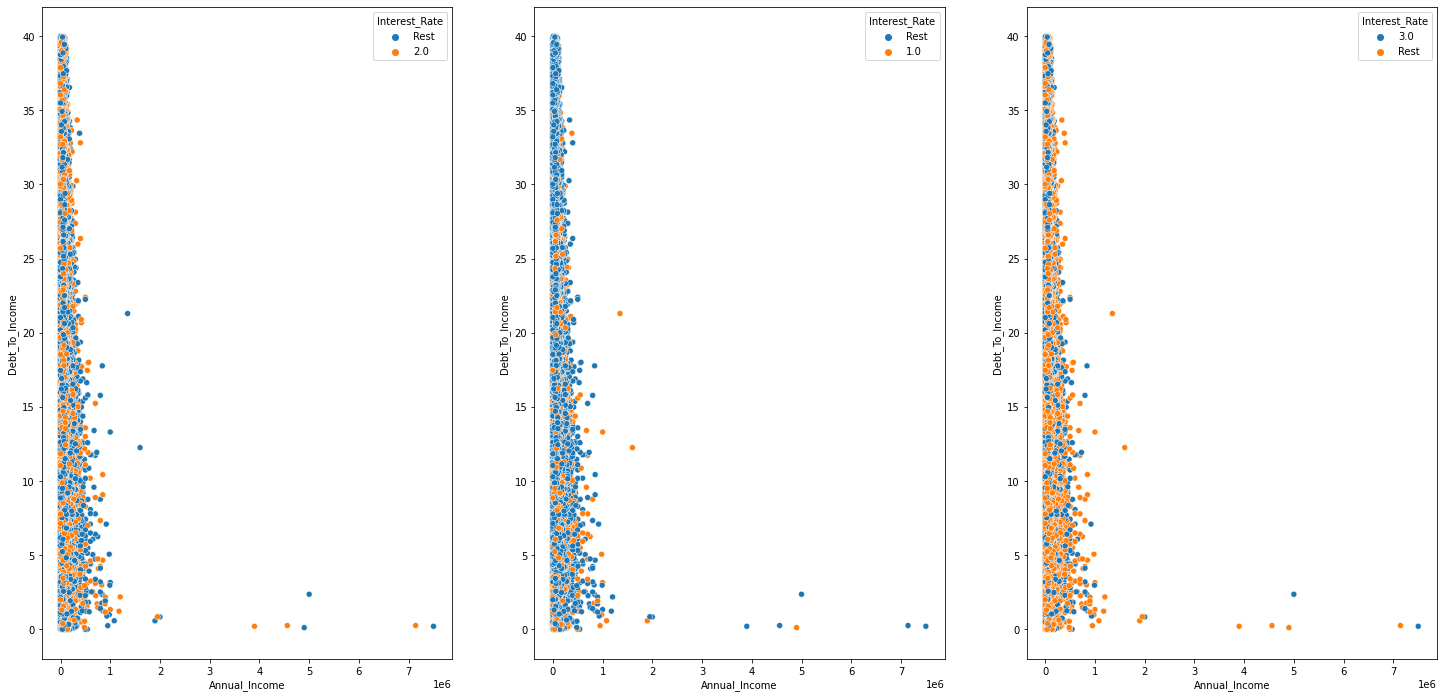

In [7]:
plt.figure(figsize = (25, 12))
ax = plt.subplot(1,3,1)
sns.scatterplot(data=twovsall, x="Annual_Income", y="Debt_To_Income", hue="Interest_Rate", ax=ax)
ax = plt.subplot(1,3,2)
sns.scatterplot(data=onevsall, x="Annual_Income", y="Debt_To_Income", hue="Interest_Rate", ax=ax)
ax = plt.subplot(1,3,3)
sns.scatterplot(data=threevsall, x="Annual_Income", y="Debt_To_Income", hue="Interest_Rate", ax=ax)

This level of overlap makes it impossible to make a linear model for prediction. Boosted gradient descent is ideal in these situations.


<AxesSubplot:xlabel='Annual_Income', ylabel='Debt_To_Income'>

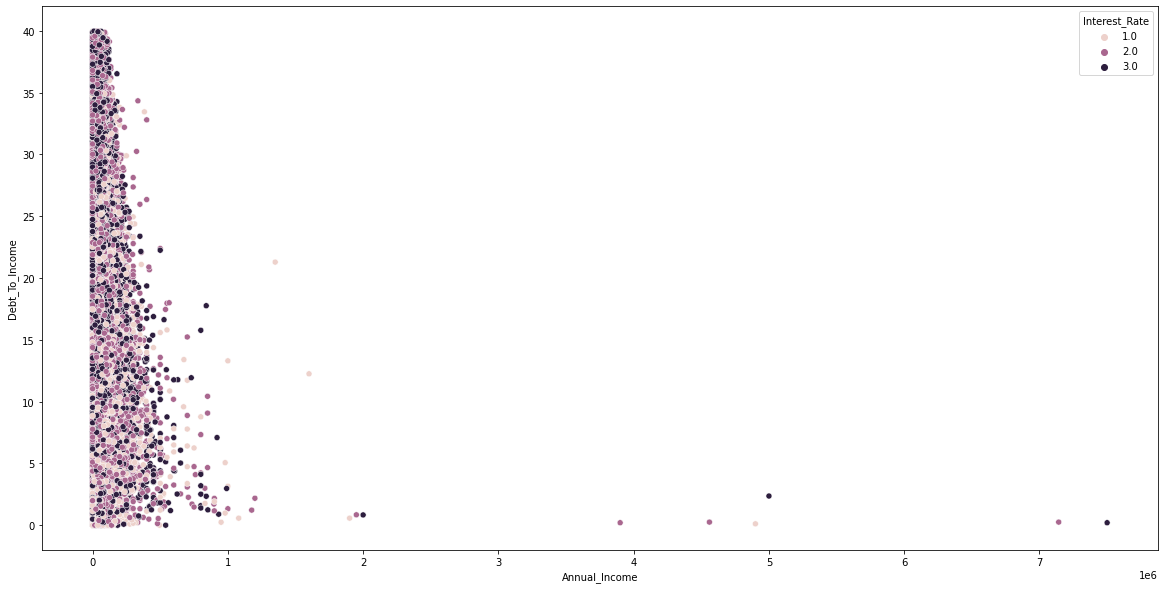

In [8]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=train_data, x="Annual_Income", y="Debt_To_Income", hue="Interest_Rate")


A pairplot of some features is plotted for the three classes.


<Figure size 1800x864 with 0 Axes>

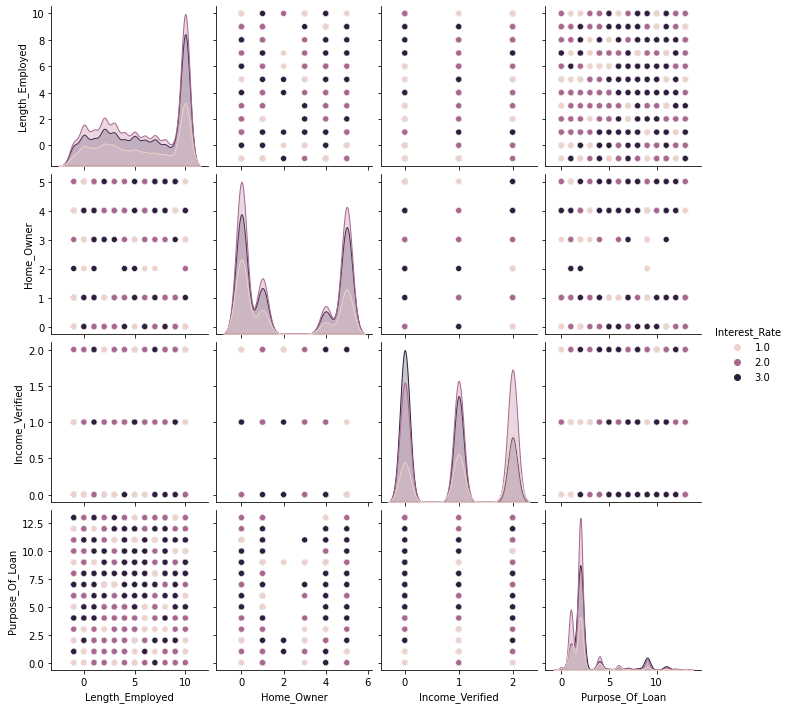

In [9]:
plt.figure(figsize = (25, 12))
sns.pairplot(train_data[["Length_Employed","Home_Owner","Income_Verified","Purpose_Of_Loan","Interest_Rate"]],hue="Interest_Rate")

<function matplotlib.pyplot.show(close=None, block=None)>

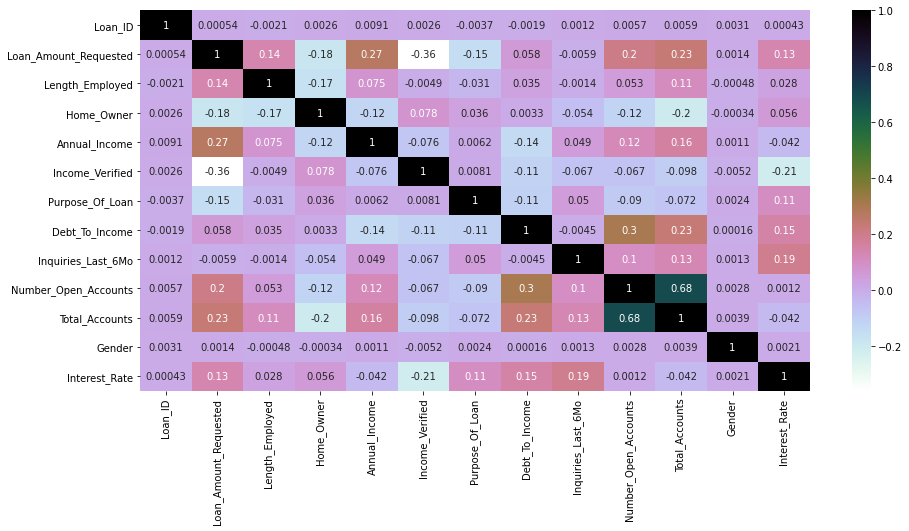

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(train_data.corr(),annot=True,cmap='cubehelix_r')
plt.show

Training data is further filtered by removing target variable coulumn and Loan_Id( unique value for each row).

In [11]:
output_data = train_data.Interest_Rate
train_data=train_data.drop(columns=['Loan_ID','Interest_Rate'])

eXtreme Gradient Booster Classifier is the model used for prediction.

In [12]:
model = XGBClassifier()
model.fit(train_data,output_data)
y_pred = model.predict(test_data)


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
train_data.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,18375,6,1,95000.0,2,1,21.45,3,17,28,1
1,4000,3,4,-1.0,2,2,21.64,0,18,33,0
2,15000,10,1,83000.0,2,2,22.90,3,11,44,1
3,27500,10,0,100000.0,1,2,9.66,0,5,14,1
4,9450,-1,5,28000.0,0,1,34.89,1,9,24,0


This code shows the graphical distribution of importance of each feature in predicting the Interest_Rate in this model.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


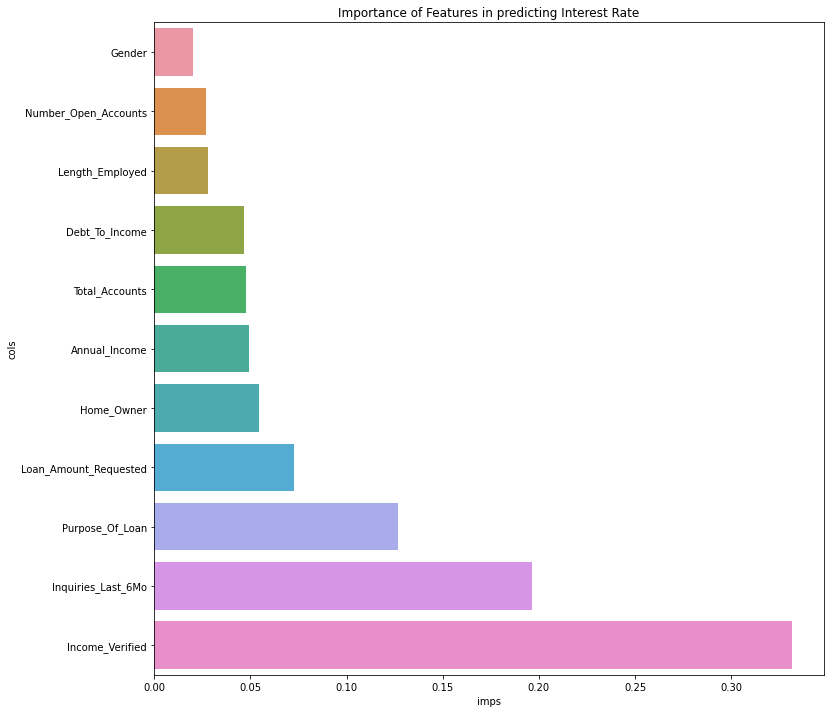

In [14]:
col_sorted_by_importance=model.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':train_data.columns[col_sorted_by_importance],
    'imps':model.feature_importances_[col_sorted_by_importance]
})

plt.figure(figsize=(12,12))
plt.title ("Importance of Features in predicting Interest Rate")
sns.barplot(feat_imp['imps'],feat_imp['cols'])
plt.show()

Further changes are made to convert the predicted interest rates into a csv.


In [15]:
sub_two = pd.DataFrame(y_pred,columns=['Interest_Rate'])
sub_two

,Interest_Rate
0,3.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
32857,1.0
32858,3.0
32859,1.0
32860,3.0


In [16]:
loanid=loanid.reset_index()
loanid=loanid.drop(columns=['index'])
loanid

,Loan_ID
0,10048970
1,10075715
2,10090330
3,10139511
4,10153644
...,...
32857,10091923
32858,10128716
32859,10037200
32860,10019409


In [17]:
mergedsubm = loanid.merge(sub_two, left_index=True, right_index=True)
mergedsubm
mergedsubm.to_csv('attemptfour.csv', index=False)